In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



In [30]:
df = pd.read_pickle('dataset_sentimens.pckl')

In [3]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [86]:
stop_words_german = list()
with open('stopp_wörter_deutsch.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split(','):
   
            # displaying the words           
            stop_words_german.append(word.replace(' ',''))

In [6]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [90]:
df['text'] = df['text'].str.replace('\n',' ')
corpus = df['text']
vectorizer = TfidfVectorizer(stop_words=stop_words_german)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


X = X.toarray() 

In [42]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print(k)


KeyboardInterrupt: 

In [46]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 0.9845682122262768
2 : 0.9823766857283489
3 : 0.9805503744841851
4 : 0.9752356593271831


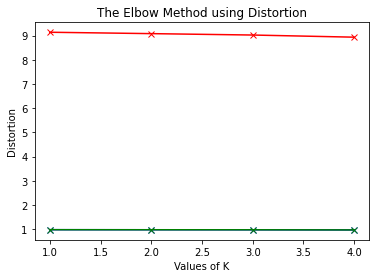

In [48]:
K = range(1,5)
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [10]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 34541.99999999994
2 : 26197.95478289078
3 : 19586.435788823397
4 : 14846.42433655258
5 : 12573.126782122432
6 : 11011.795937054332
7 : 9872.4472275656
8 : 8890.436382034246
9 : 7866.838875301352


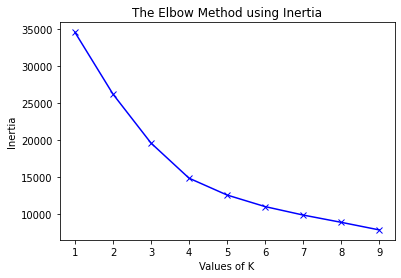

In [11]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


/home/egon/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [13]:
cluster_centers[0]

array([-0.01623993, -0.04210982, -0.03422796, -0.36348765, -0.7299933 ,
        0.79986026])

In [14]:
np.bincount(kmeans.labels_)

array([3002, 2254,  476,   25])

In [17]:
df['kmeans_label'] = kmeans.labels_

In [18]:
df['neun_euro_context'] = df['neun_euro_context']
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3
index,9488.002665,9703.927240,9435.802521,7849.120000
public_metrics.retweet_count,0.294470,0.179681,0.121849,22.480000
public_metrics.reply_count,0.770486,0.820763,0.735294,21.240000
public_metrics.like_count,4.035976,4.061224,4.327731,194.080000
public_metrics.quote_count,0.033644,0.028394,0.016807,3.520000
is_retweet,0.000000,0.000000,0.000000,0.000000
neun_euro_context,0.063957,0.060781,0.046218,0.080000
positive,-2.034184,-1.699498,2.432483,-1.846059
negative,-0.654717,2.848467,-0.500274,0.234128
neutral,3.866708,-0.939632,-1.843498,2.541142


https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

In [31]:
df['text'] = df['text'].str.replace('\n',' ')

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


X = X.toarray() 

(5757, 23511)


In [41]:
X = X.toarray() 

In [55]:
a = vectorizer.get_stop_words()

In [57]:
a